Mounted at /content/drive


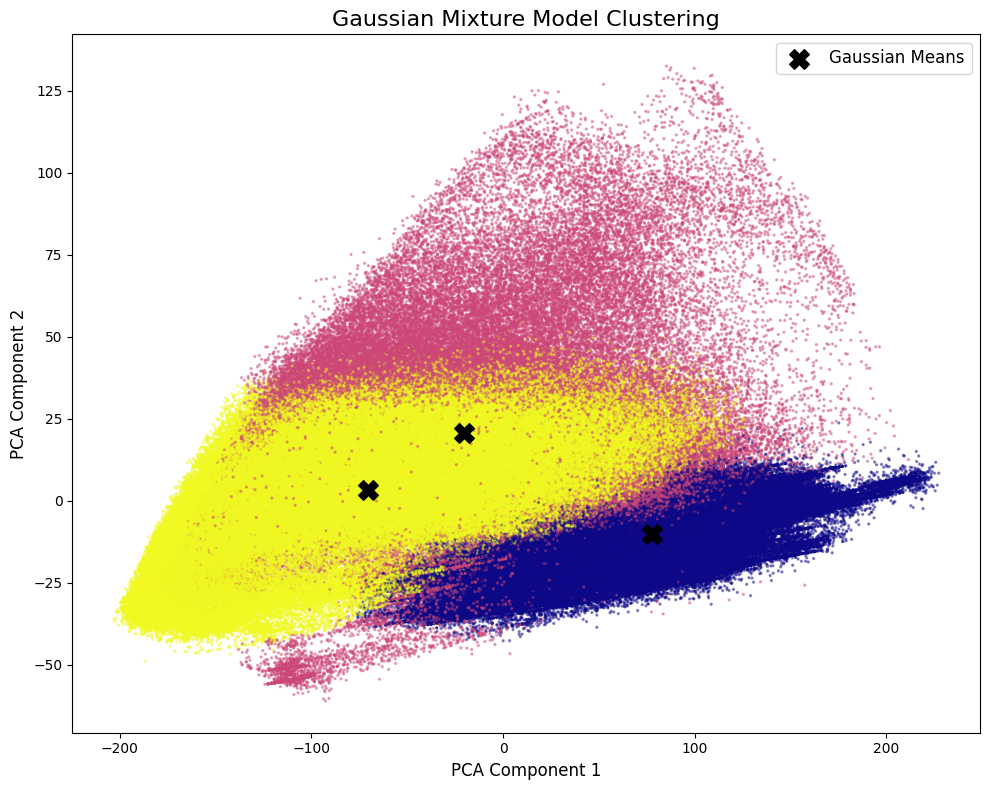

In [2]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Function to process selected folders for GMM clustering
def process_selected_folders(source_directory, folders, sample_size=100):
    all_pixels = []

    for folder in folders:
        folder_path = os.path.join(source_directory, folder)
        if os.path.isdir(folder_path):
            images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sampled_images = random.sample(images, min(sample_size, len(images)))

            for image_name in sampled_images:
                image_path = os.path.join(folder_path, image_name)
                try:
                    image = Image.open(image_path).convert("RGB")
                    image = image.resize((64, 64))  # Resize to a smaller size
                    image_np = np.array(image)
                    pixels = image_np.reshape(-1, 3)
                    all_pixels.extend(pixels.tolist())
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

    all_pixels = np.array(all_pixels)

    if len(all_pixels) == 0:
        print("No pixels collected. Check if images are available.")
        return None, None

    return all_pixels

# Function to visualize GMM clusters with smooth blending and smaller dots
def visualize_gmm_clusters(gmm, all_pixels):
    pca = PCA(n_components=2)  # Reduce dimensionality to 2D for visualization
    pixels_2d = pca.fit_transform(all_pixels)

    # Predict cluster membership for each pixel
    labels = gmm.predict(all_pixels)

    plt.figure(figsize=(10, 8))

    # Scatter plot for pixels with finer dots and smooth color blending
    plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], c=labels, cmap='plasma', s=2, alpha=0.4)

    # Plot GMM means (cluster centers) with larger markers
    means_2d = pca.transform(gmm.means_)
    plt.scatter(means_2d[:, 0], means_2d[:, 1], color='black', marker='X', s=200, label='Gaussian Means')

    # Set title and labels
    plt.title("Gaussian Mixture Model Clustering", fontsize=16)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)

    # Add a legend
    plt.legend(loc='upper right', fontsize=12)

    # Use a tight layout and display the plot
    plt.tight_layout()
    plt.show()

# Directory path
source_directory = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'
selected_folders = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

# Process images and prepare for clustering
all_pixels = process_selected_folders(source_directory, selected_folders, sample_size=100)

if all_pixels is not None:
    # Perform Gaussian Mixture Model clustering
    n_components = 3  # Number of components (clusters)
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(all_pixels)

    # Visualize GMM clusters
    visualize_gmm_clusters(gmm, all_pixels)


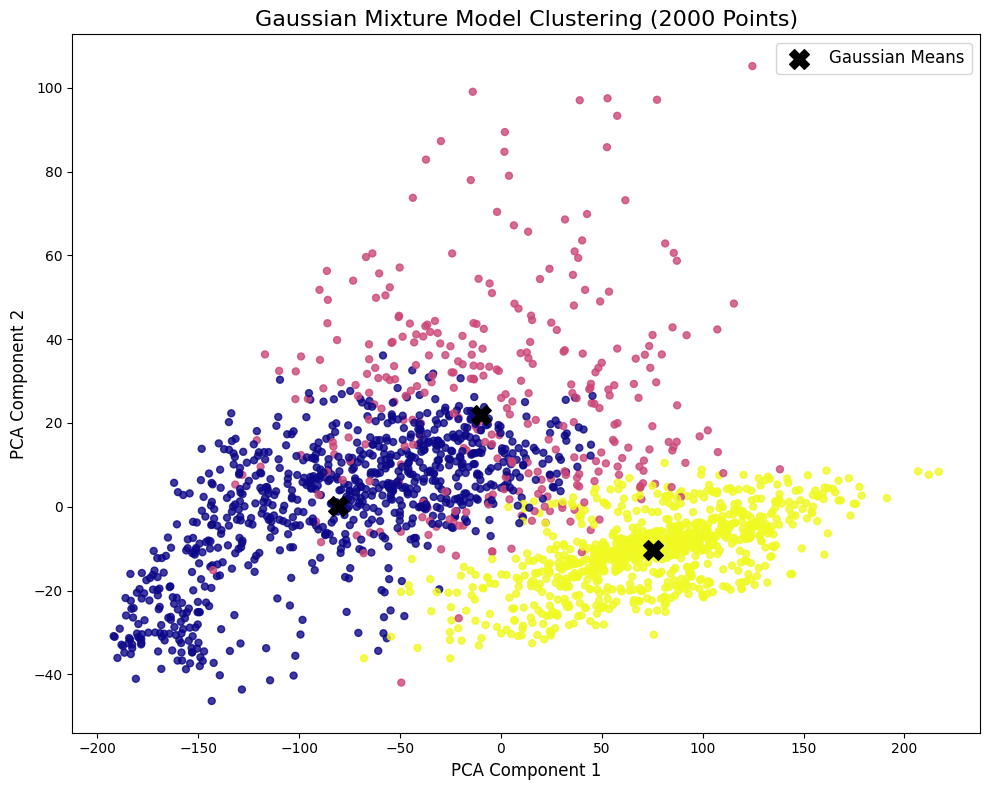

In [7]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Function to process selected folders for GMM clustering with a 500-point sample
def process_selected_folders(source_directory, folders, sample_size=500):
    all_pixels = []

    for folder in folders:
        folder_path = os.path.join(source_directory, folder)
        if os.path.isdir(folder_path):
            images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            sampled_images = random.sample(images, min(sample_size, len(images)))

            for image_name in sampled_images:
                image_path = os.path.join(folder_path, image_name)
                try:
                    image = Image.open(image_path).convert("RGB")
                    image = image.resize((64, 64))  # Resize to a smaller size
                    image_np = np.array(image)
                    pixels = image_np.reshape(-1, 3)
                    all_pixels.extend(pixels.tolist())
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

    all_pixels = np.array(all_pixels)

    if len(all_pixels) == 0:
        print("No pixels collected. Check if images are available.")
        return None

    # Sample only 500 points from the collected pixels for GMM clustering
    all_pixels_sampled = all_pixels[random.sample(range(len(all_pixels)), min(2000, len(all_pixels)))]

    return all_pixels_sampled

# Function to visualize GMM clusters with smaller dots and smooth color blending for 500 points
def visualize_gmm_clusters(gmm, all_pixels):
    pca = PCA(n_components=2)  # Reduce dimensionality to 2D for visualization
    pixels_2d = pca.fit_transform(all_pixels)

    # Predict cluster membership for each pixel
    labels = gmm.predict(all_pixels)

    plt.figure(figsize=(10, 8))

    # Scatter plot for pixels with fine dots and smooth color blending
    plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], c=labels, cmap='plasma', s=25, alpha=0.8)

    # Plot GMM means (cluster centers) with larger markers
    means_2d = pca.transform(gmm.means_)
    plt.scatter(means_2d[:, 0], means_2d[:, 1], color='black', marker='X', s=200, label='Gaussian Means')

    # Set title and labels
    plt.title("Gaussian Mixture Model Clustering (2000 Points)", fontsize=16)
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)

    # Add a legend
    plt.legend(loc='upper right', fontsize=12)

    # Use a tight layout and display the plot
    plt.tight_layout()
    plt.show()

# Directory path
source_directory = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'
selected_folders = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

# Process images and prepare for clustering (sample size of 500 points)
all_pixels = process_selected_folders(source_directory, selected_folders, sample_size=500)

if all_pixels is not None:
    # Perform Gaussian Mixture Model clustering
    n_components = 3  # Number of components (clusters)
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(all_pixels)

    # Visualize GMM clusters
    visualize_gmm_clusters(gmm, all_pixels)


Iteration 1
Log Likelihood: -2221.8338083422004
Means: [[ 6.04986283 -0.096616  ]
 [ 5.43491728  0.850668  ]
 [ 1.29825054  1.34825747]]



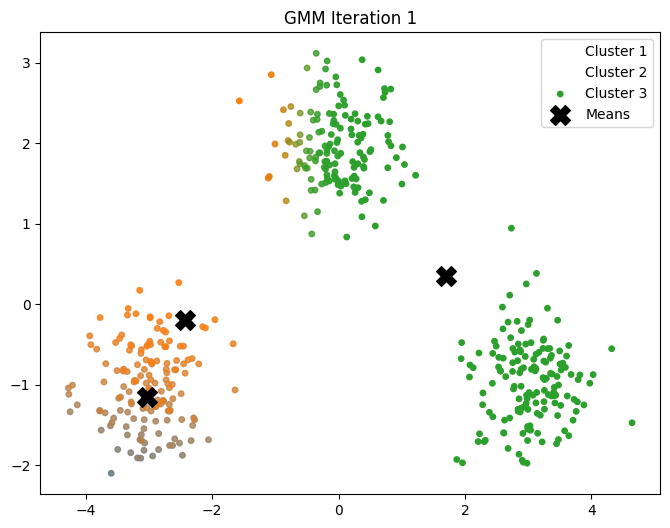

Iteration 2
Log Likelihood: -1408.4574799386246
Means: [[ 6.03402305 -0.04970529]
 [ 5.34763122  0.89958555]
 [ 1.34779752  1.38281313]]

Iteration 3
Log Likelihood: -1385.682327183101
Means: [[ 6.03344128 -0.02331509]
 [ 5.10680105  1.12921555]
 [ 1.34889803  1.37865164]]



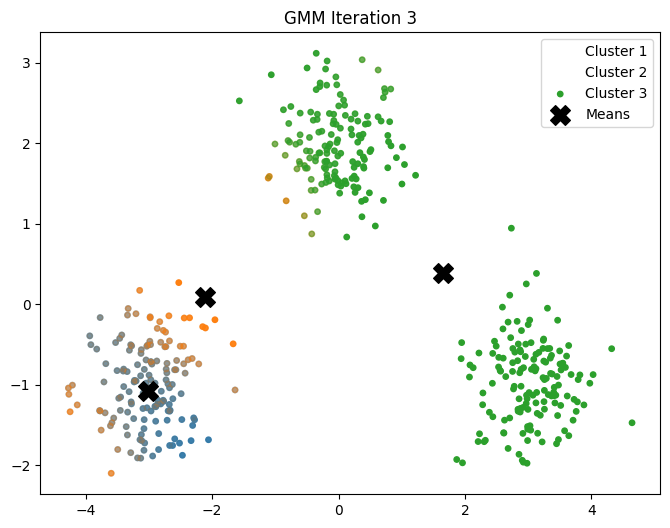

Iteration 4
Log Likelihood: -1373.6814237861695
Means: [[ 6.03310693e+00 -2.80850697e-03]
 [ 4.73021239e+00  1.48232020e+00]
 [ 1.32443229e+00  1.34991123e+00]]

Iteration 5
Log Likelihood: -1365.1527213167042
Means: [[6.03466525 0.01030053]
 [4.31301419 1.86567298]
 [1.28635406 1.30762814]]



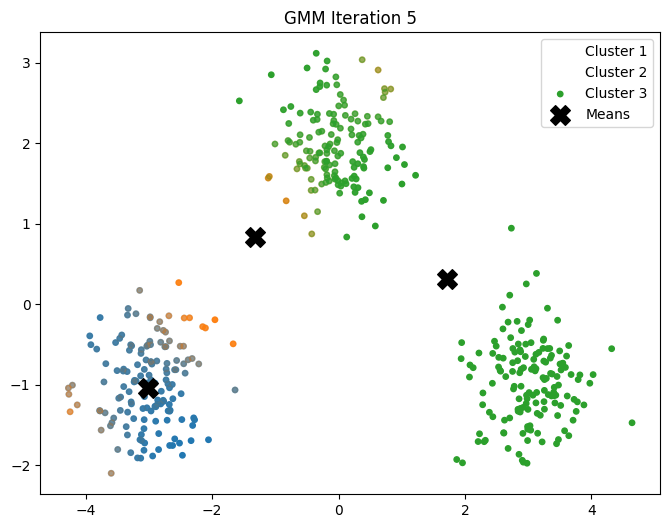

Iteration 6
Log Likelihood: -1358.6018221667232
Means: [[6.03898242 0.01794596]
 [3.94559183 2.19723583]
 [1.24199436 1.26092916]]

Iteration 7
Log Likelihood: -1352.5628566464102
Means: [[6.04317187 0.02470476]
 [3.6356924  2.47324181]
 [1.18942767 1.2085134 ]]



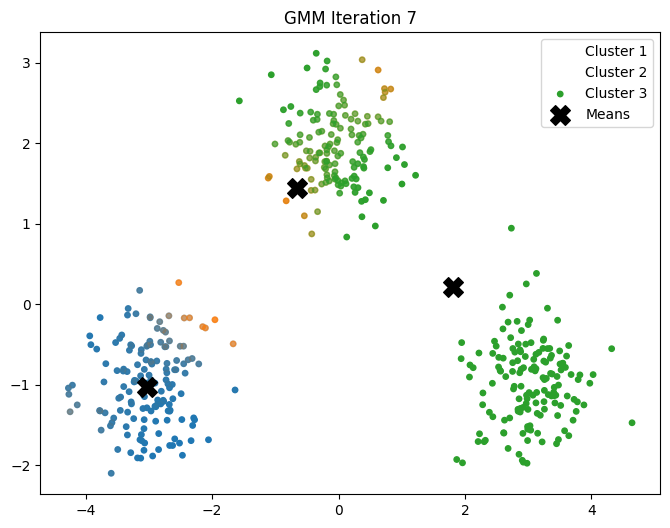

Iteration 8
Log Likelihood: -1344.8826166334397
Means: [[6.04228025 0.03468389]
 [3.3709443  2.7101011 ]
 [1.11976408 1.14126628]]

Iteration 9
Log Likelihood: -1331.160162781403
Means: [[6.03112473 0.05091066]
 [3.16576013 2.89798315]
 [1.01438135 1.04050643]]



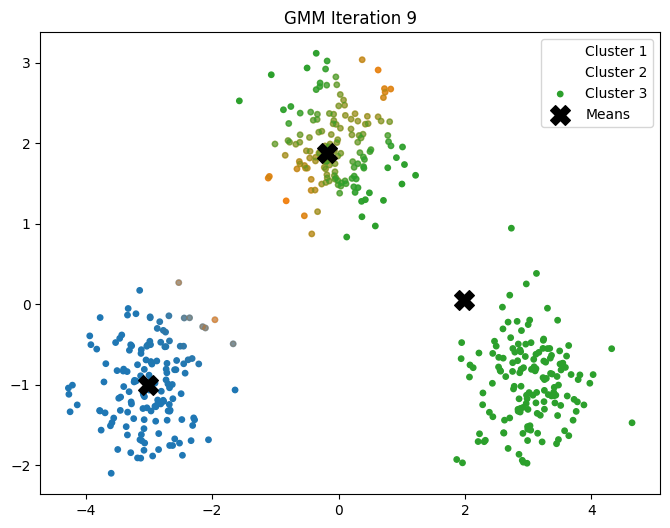

Iteration 10
Log Likelihood: -1302.3759523670283
Means: [[6.01817731 0.06408647]
 [3.0742362  2.9825936 ]
 [0.84191747 0.87434244]]



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Gaussian PDF for multivariate normal distribution
def gaussian_pdf(X, mean, cov):
    n = X.shape[1]
    diff = X - mean
    inv_cov = np.linalg.inv(cov)
    exponent = np.exp(-0.5 * np.sum(diff @ inv_cov * diff, axis=1))
    denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    return exponent / denominator

# Step-by-step GMM with iteration visualization
def gmm_with_iterations(X, n_components, max_iter=10):
    n_samples, n_features = X.shape
    np.random.seed(42)

    # Initialize the means, covariances, and weights randomly
    means = X[np.random.choice(n_samples, n_components, replace=False)]
    covariances = [np.eye(n_features)] * n_components  # Identity matrices initially
    weights = np.ones(n_components) / n_components     # Equal weights initially

    log_likelihoods = []

    for iteration in range(max_iter):
        print(f"Iteration {iteration + 1}")

        # E-step: Calculate the responsibilities (soft assignment of clusters)
        responsibilities = np.zeros((n_samples, n_components))
        for k in range(n_components):
            responsibilities[:, k] = weights[k] * gaussian_pdf(X, means[k], covariances[k])

        # Normalize the responsibilities
        total_responsibilities = responsibilities.sum(axis=1)[:, np.newaxis]
        responsibilities /= total_responsibilities

        # M-step: Update the parameters
        N_k = responsibilities.sum(axis=0)
        for k in range(n_components):
            # Update means
            means[k] = (responsibilities[:, k][:, np.newaxis] * X).sum(axis=0) / N_k[k]

            # Update covariances
            diff = X - means[k]
            covariances[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / N_k[k]

            # Update weights
            weights[k] = N_k[k] / n_samples

        # Compute log likelihood for convergence check
        log_likelihood = np.sum(np.log(total_responsibilities))
        log_likelihoods.append(log_likelihood)

        print(f"Log Likelihood: {log_likelihood}")
        print(f"Means: {means}\n")

        # Visualization of clusters after every iteration (Optional)
        if iteration % 2 == 0:  # Plot after every 2 iterations
            visualize_gmm_clusters_intermediate(X, responsibilities, means, iteration)

    return means, covariances, weights, log_likelihoods

# Function to visualize GMM clusters during each iteration
def visualize_gmm_clusters_intermediate(X, responsibilities, means, iteration):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    means_2d = pca.transform(means)

    plt.figure(figsize=(8, 6))

    # Plot points with soft responsibilities as transparency
    for k in range(responsibilities.shape[1]):
        plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=responsibilities[:, k], label=f'Cluster {k + 1}', s=15)

    # Plot means (cluster centers)
    plt.scatter(means_2d[:, 0], means_2d[:, 1], color='black', marker='X', s=200, label='Means')

    plt.title(f"GMM Iteration {iteration + 1}")
    plt.legend()
    plt.show()

# Generating synthetic data for demonstration
np.random.seed(42)
X = np.vstack([
    np.random.normal([0, 0], 0.5, (150, 2)),
    np.random.normal([3, 3], 0.5, (150, 2)),
    np.random.normal([6, 0], 0.5, (150, 2))
])

# Running GMM with 3 components for 10 iterations
n_components = 3
max_iter = 10
means, covariances, weights, log_likelihoods = gmm_with_iterations(X, n_components, max_iter)
